In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

# Carichiamo i dati d'interesse

In [81]:
num_cluster = 5

x_bound = int(155/5)

y_bound = int(155/5)

with open('./pickles/rese_total.pickle', 'rb') as handle:
    rese_total = pickle.load(handle)

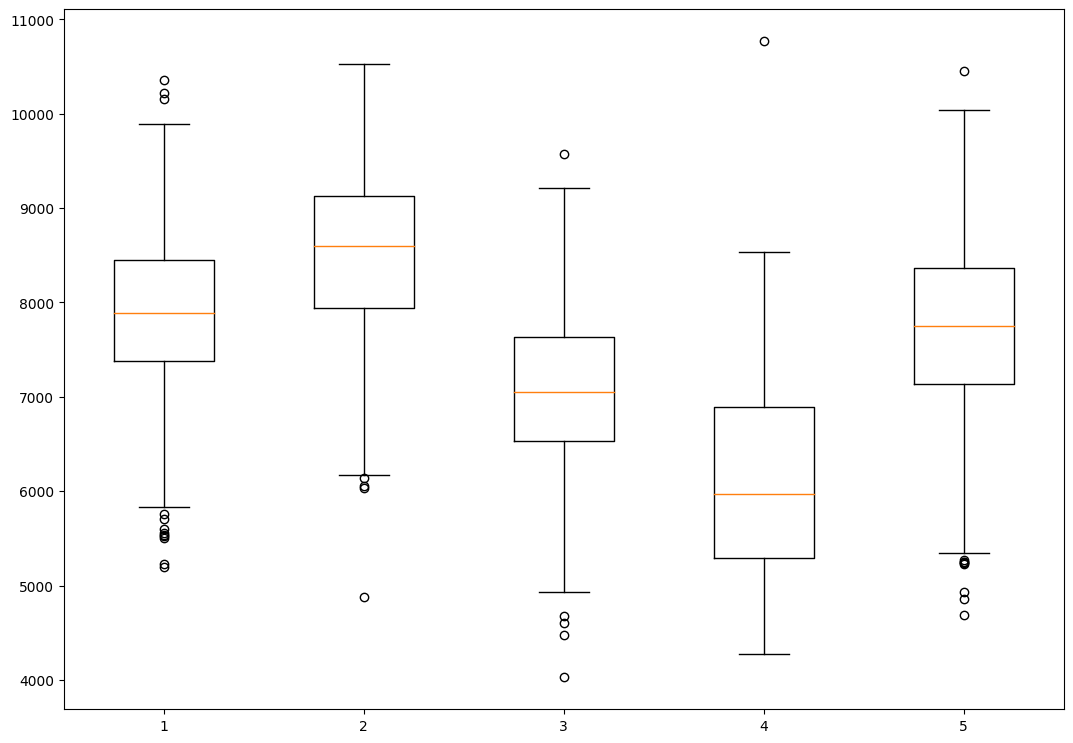

In [82]:
fig = plt.figure(figsize =(10, 7))

stampa = []

for a in range(0,num_cluster):
    stampa.append(rese_total[0,0,a])

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(stampa)

# show plot
plt.show()

# Usiamo i dataframe per andare a calcolare i max e min dei vari boxplot

In [83]:
min_max = np.zeros([x_bound,y_bound,num_cluster,2], dtype=float)

for a in range(x_bound):
    for b in range(y_bound):
        if(rese_total[a,b,0] is not None):
            for c in range(num_cluster):
                min_max[a,b,c,:] = [np.quantile(rese_total[a,b,c],q=0.25),np.quantile(rese_total[a,b,c],q=0.75)]


In [84]:
print(min_max)

[[[[7377.67492676 8445.27490234]
   [7943.5        9132.        ]
   [6533.60009766 7638.89990234]
   [5291.         6889.94995117]
   [7141.12487793 8365.5       ]]

  [[7415.94995117 8420.45019531]
   [5322.60009766 6931.10009766]
   [6564.5        7638.89990234]
   [7140.89990234 8365.5       ]
   [7940.75       9135.70019531]]

  [[7415.94995117 8420.45019531]
   [5322.60009766 6931.10009766]
   [7940.75       9135.70019531]
   [7140.89990234 8365.5       ]
   [6564.5        7638.89990234]]

  ...

  [[7614.07495117 8821.44970703]
   [7018.34985352 8574.5       ]
   [6522.60009766 7812.5       ]
   [6281.89990234 7744.29980469]
   [7736.15002441 8995.10009766]]

  [[6433.74987793 7994.12512207]
   [7092.72509766 8491.10009766]
   [6757.60009766 8274.20019531]
   [7475.29980469 9171.40039062]
   [7215.14990234 8778.39990234]]

  [[   0.            0.        ]
   [   0.            0.        ]
   [   0.            0.        ]
   [   0.            0.        ]
   [   0.            0.   

# Andiamo a fare il calcolo delle permutazioni, andando a confrontare i min e i max

In [86]:
from itertools import permutations
perm = list(permutations(range(num_cluster), 2))
'''print(list(perm))
print(perm[0][1])'''
difference_min_max = np.zeros([x_bound,y_bound,2])

for a in range(x_bound):
    for b in range(y_bound):
        difference_array = []
        for c in perm:
            difference_array.append(min_max[a,b,c[0],0]-min_max[a,b,c[1],1])
        difference_min_max[a,b,0] = min(difference_array)
        difference_min_max[a,b,1] = max(difference_array)
            

# Plot delle differenze

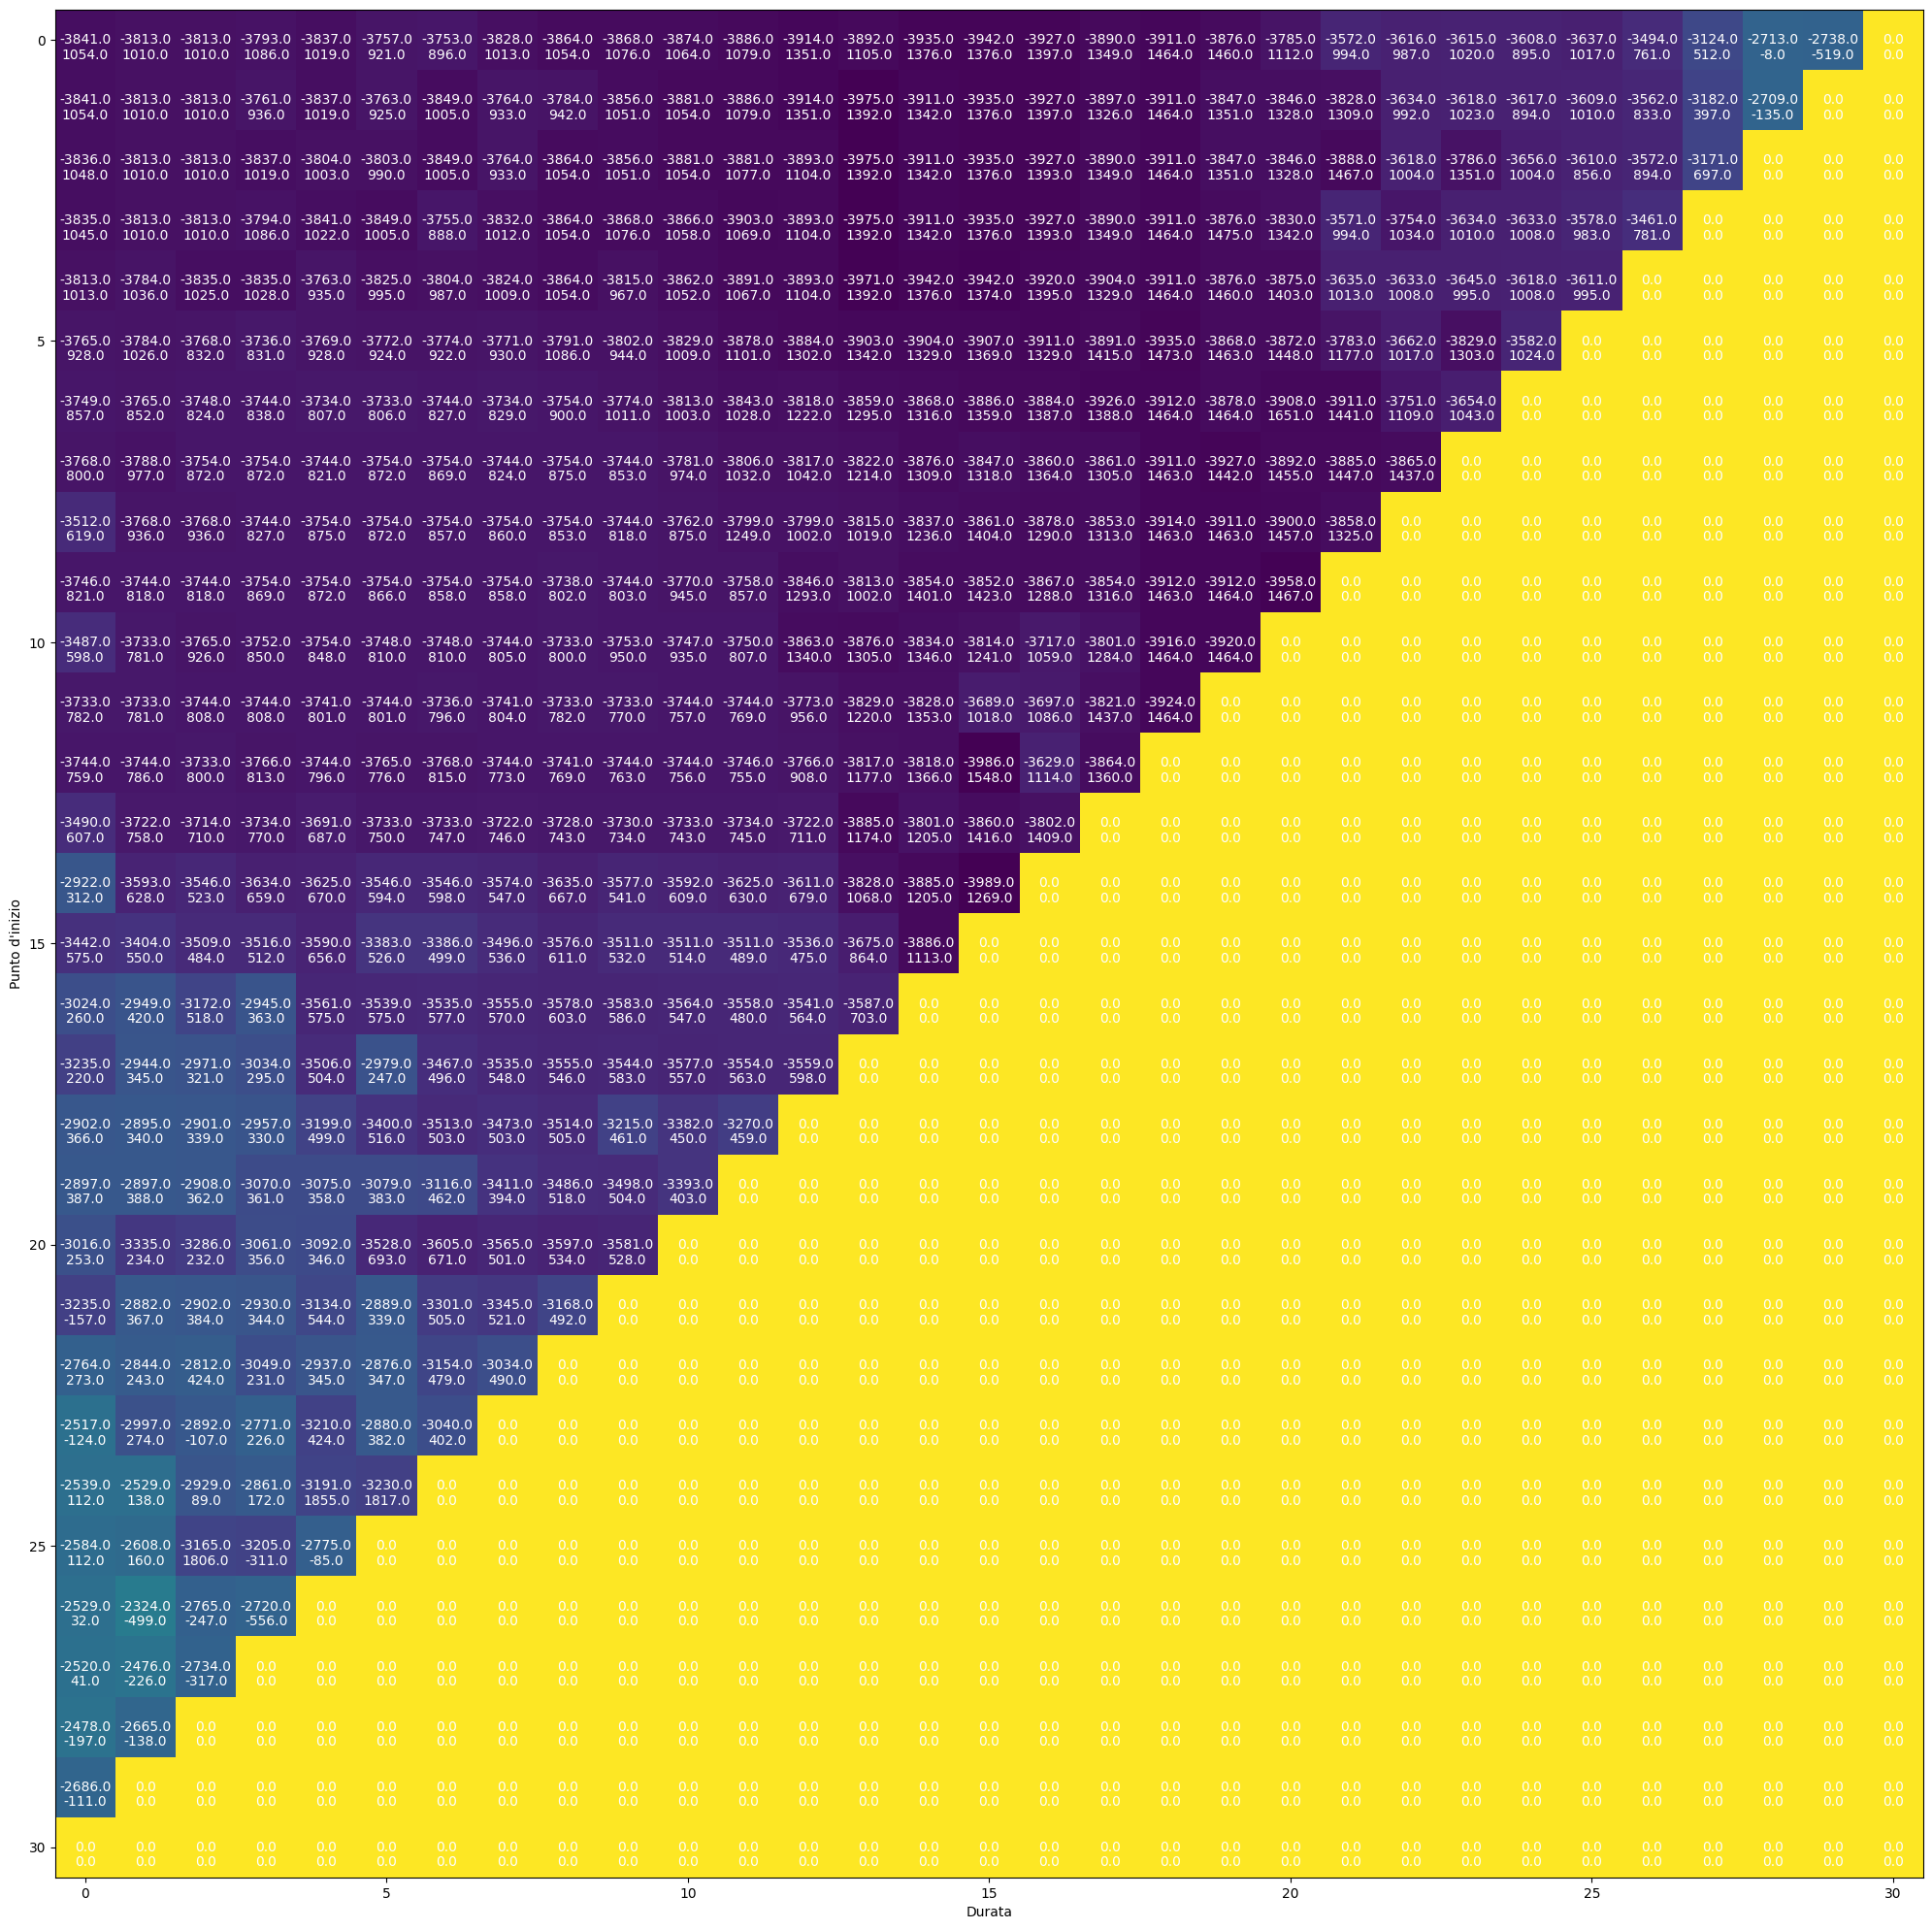

In [89]:
# Andiamo a stampare le deviazioni standard di tutti i cluster 

fig, ax = plt.subplots()
image = ax.imshow(difference_min_max[:,:,0])
plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")
fig.set_size_inches(25,25)
for i in range(0,difference_min_max.shape[0]):
    for j in range(0,difference_min_max.shape[1]):
        c = np.round(difference_min_max[i,j,0],decimals=0)
        c1 = np.round(difference_min_max[i,j,1])
        ax.text(j, i, str(c), va='center', ha='center',color= 'white')
        ax.text(j,(i+0.25),str(c1),va='center', ha='center',color= 'white')